In [1]:
from pathlib import Path
import tensorflow.compat.v2 as tf
import data, unet, util

## Load data

In [2]:
batch_size = 5

data_dir = Path("../data/")
train, nb_train = data.get_dataset(data_dir, "train", batch_size)
val, nb_val = data.get_dataset(data_dir, "val", batch_size)

nb_train, nb_val

(19, 5)

Only 19 training and 5 validation samples. Thus, we use lots of data augmentation like resizing, cropping, flipping, and rotating as it can be seen below from the plotted images during training.

## Init U-Net model

Use pre-trained [MobileNetV2](https://arxiv.org/abs/1801.04381) as encoder in [U-Net](https://arxiv.org/abs/1505.04597) architecure with one-channel output.

<img src="unet-architecture.png" alt="U-Net architecture" style="width: 600px;"/>

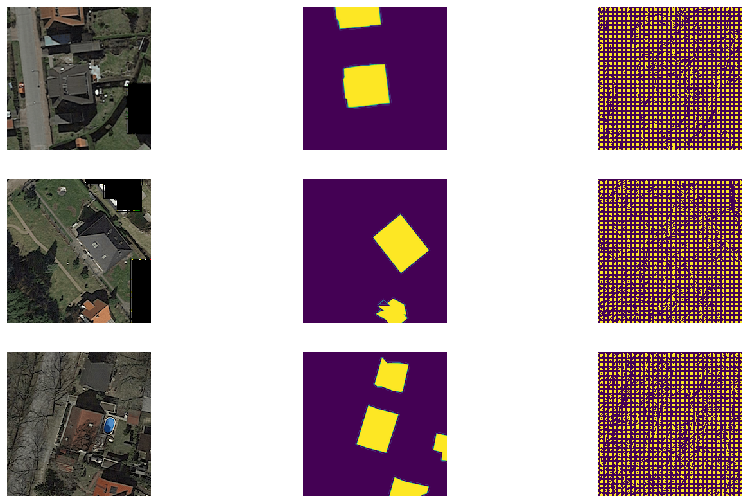

In [3]:
model = unet.get_model(input_shape=(224, 224, 3), output_channels=1, output_act=None)

util.show_predictions(train, model, num=3)

## Train model

We use the [Adam](https://arxiv.org/abs/1412.6980) optimizer and the binary crossentropy loss function.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train for 3 steps, validate for 1 steps
Epoch 1/100
2/3 [===================>..........] - ETA: 3s - loss: 0.5835 - accuracy: 0.7542 

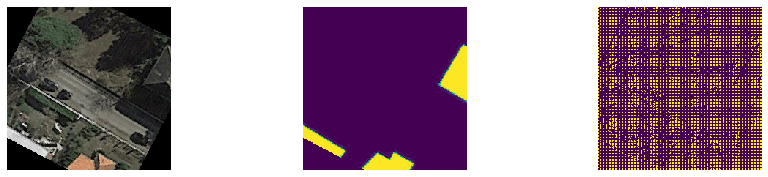

3/3 [==============================] - 10s 3s/step - loss: 0.5775 - accuracy: 0.7598 - val_loss: 0.5659 - val_accuracy: 0.7534
Epoch 2/100
3/3 [==============================] - 2s 690ms/step - loss: 0.6028 - accuracy: 0.7391 - val_loss: 0.5552 - val_accuracy: 0.7604
Epoch 3/100
3/3 [==============================] - 2s 678ms/step - loss: 0.5632 - accuracy: 0.7677 - val_loss: 0.5452 - val_accuracy: 0.7668
Epoch 4/100
3/3 [==============================] - 2s 672ms/step - loss: 0.5352 - accuracy: 0.7925 - val_loss: 0.5357 - val_accuracy: 0.7724
Epoch 5/100
3/3 [==============================] - 2s 668ms/step - loss: 0.5195 - accuracy: 0.7936 - val_loss: 0.5264 - val_accuracy: 0.7775
Epoch 6/100
3/3 [==============================] - 2s 690ms/step - loss: 0.5239 - accuracy: 0.7808 - val_loss: 0.5179 - val_accuracy: 0.7816
Epoch 7/100
3/3 [==============================] - 2s 675ms/step - loss: 0.4783 - accuracy: 0.8194 - val_loss: 0.5084 - val_accuracy: 0.7855
Epoch 8/100
3/3 [==========

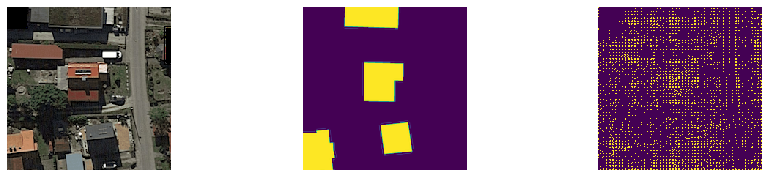

3/3 [==============================] - 3s 906ms/step - loss: 0.4205 - accuracy: 0.8178 - val_loss: 0.4600 - val_accuracy: 0.7961
Epoch 12/100
3/3 [==============================] - 2s 680ms/step - loss: 0.3812 - accuracy: 0.8448 - val_loss: 0.4441 - val_accuracy: 0.7994
Epoch 13/100
3/3 [==============================] - 2s 680ms/step - loss: 0.3829 - accuracy: 0.8246 - val_loss: 0.4284 - val_accuracy: 0.8034
Epoch 14/100
3/3 [==============================] - 2s 663ms/step - loss: 0.3611 - accuracy: 0.8423 - val_loss: 0.4136 - val_accuracy: 0.8090
Epoch 15/100
3/3 [==============================] - 2s 670ms/step - loss: 0.3483 - accuracy: 0.8479 - val_loss: 0.4003 - val_accuracy: 0.8148
Epoch 16/100
3/3 [==============================] - 2s 664ms/step - loss: 0.3336 - accuracy: 0.8485 - val_loss: 0.3879 - val_accuracy: 0.8201
Epoch 17/100
3/3 [==============================] - 2s 681ms/step - loss: 0.3204 - accuracy: 0.8519 - val_loss: 0.3773 - val_accuracy: 0.8251
Epoch 18/100
3/3 [=

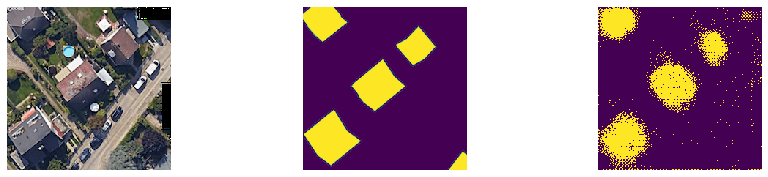

3/3 [==============================] - 3s 899ms/step - loss: 0.2891 - accuracy: 0.8544 - val_loss: 0.3463 - val_accuracy: 0.8433
Epoch 22/100
3/3 [==============================] - 2s 679ms/step - loss: 0.2766 - accuracy: 0.8678 - val_loss: 0.3389 - val_accuracy: 0.8464
Epoch 23/100
3/3 [==============================] - 2s 677ms/step - loss: 0.2929 - accuracy: 0.8407 - val_loss: 0.3347 - val_accuracy: 0.8494
Epoch 24/100
3/3 [==============================] - 2s 674ms/step - loss: 0.2747 - accuracy: 0.8623 - val_loss: 0.3309 - val_accuracy: 0.8528
Epoch 25/100
3/3 [==============================] - 2s 676ms/step - loss: 0.2805 - accuracy: 0.8457 - val_loss: 0.3294 - val_accuracy: 0.8544
Epoch 26/100
3/3 [==============================] - 2s 658ms/step - loss: 0.2466 - accuracy: 0.8819 - val_loss: 0.3248 - val_accuracy: 0.8555
Epoch 27/100
3/3 [==============================] - 2s 674ms/step - loss: 0.2658 - accuracy: 0.8485 - val_loss: 0.3160 - val_accuracy: 0.8566
Epoch 28/100
3/3 [=

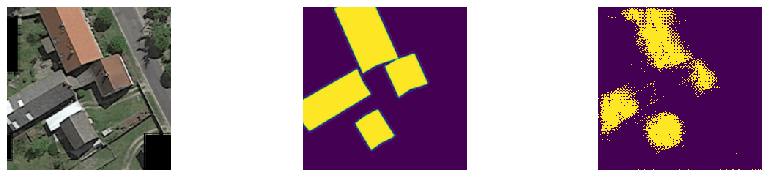

3/3 [==============================] - 3s 910ms/step - loss: 0.2259 - accuracy: 0.8877 - val_loss: 0.2873 - val_accuracy: 0.8597
Epoch 32/100
3/3 [==============================] - 2s 685ms/step - loss: 0.2552 - accuracy: 0.8380 - val_loss: 0.2835 - val_accuracy: 0.8604
Epoch 33/100
3/3 [==============================] - 2s 668ms/step - loss: 0.2151 - accuracy: 0.8982 - val_loss: 0.2799 - val_accuracy: 0.8616
Epoch 34/100
3/3 [==============================] - 2s 660ms/step - loss: 0.2154 - accuracy: 0.8898 - val_loss: 0.2754 - val_accuracy: 0.8623
Epoch 35/100
3/3 [==============================] - 2s 657ms/step - loss: 0.2134 - accuracy: 0.8826 - val_loss: 0.2697 - val_accuracy: 0.8604
Epoch 36/100
3/3 [==============================] - 2s 661ms/step - loss: 0.2162 - accuracy: 0.8878 - val_loss: 0.2651 - val_accuracy: 0.8576
Epoch 37/100
3/3 [==============================] - 2s 662ms/step - loss: 0.2164 - accuracy: 0.8670 - val_loss: 0.2609 - val_accuracy: 0.8542
Epoch 38/100
3/3 [=

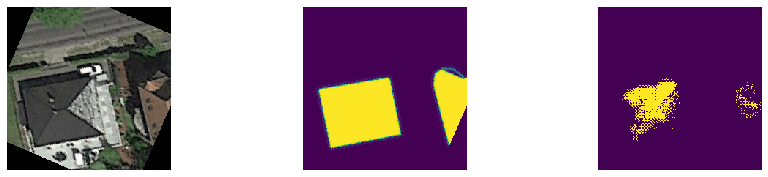

3/3 [==============================] - 3s 925ms/step - loss: 0.2134 - accuracy: 0.8657 - val_loss: 0.2447 - val_accuracy: 0.8606
Epoch 42/100
3/3 [==============================] - 2s 662ms/step - loss: 0.1913 - accuracy: 0.8926 - val_loss: 0.2429 - val_accuracy: 0.8611
Epoch 43/100
3/3 [==============================] - 2s 676ms/step - loss: 0.1924 - accuracy: 0.8879 - val_loss: 0.2413 - val_accuracy: 0.8611
Epoch 44/100
3/3 [==============================] - 2s 674ms/step - loss: 0.1778 - accuracy: 0.9106 - val_loss: 0.2400 - val_accuracy: 0.8622
Epoch 45/100
3/3 [==============================] - 2s 679ms/step - loss: 0.1982 - accuracy: 0.8699 - val_loss: 0.2389 - val_accuracy: 0.8591
Epoch 46/100
3/3 [==============================] - 2s 663ms/step - loss: 0.2044 - accuracy: 0.8708 - val_loss: 0.2393 - val_accuracy: 0.8571
Epoch 47/100
3/3 [==============================] - 2s 661ms/step - loss: 0.1816 - accuracy: 0.9025 - val_loss: 0.2369 - val_accuracy: 0.8579
Epoch 48/100
3/3 [=

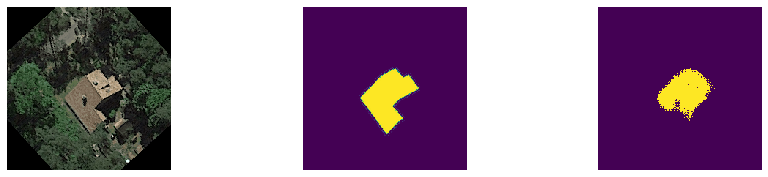

3/3 [==============================] - 3s 882ms/step - loss: 0.1702 - accuracy: 0.9079 - val_loss: 0.2246 - val_accuracy: 0.8602
Epoch 52/100
3/3 [==============================] - 2s 671ms/step - loss: 0.1943 - accuracy: 0.8731 - val_loss: 0.2231 - val_accuracy: 0.8605
Epoch 53/100
3/3 [==============================] - 2s 666ms/step - loss: 0.1625 - accuracy: 0.9054 - val_loss: 0.2211 - val_accuracy: 0.8611
Epoch 54/100
3/3 [==============================] - 2s 660ms/step - loss: 0.1783 - accuracy: 0.8863 - val_loss: 0.2211 - val_accuracy: 0.8581
Epoch 55/100
3/3 [==============================] - 2s 664ms/step - loss: 0.1590 - accuracy: 0.9049 - val_loss: 0.2219 - val_accuracy: 0.8534
Epoch 56/100
3/3 [==============================] - 2s 658ms/step - loss: 0.1622 - accuracy: 0.9029 - val_loss: 0.2226 - val_accuracy: 0.8495
Epoch 57/100
3/3 [==============================] - 2s 678ms/step - loss: 0.1615 - accuracy: 0.8965 - val_loss: 0.2201 - val_accuracy: 0.8501
Epoch 58/100
3/3 [=

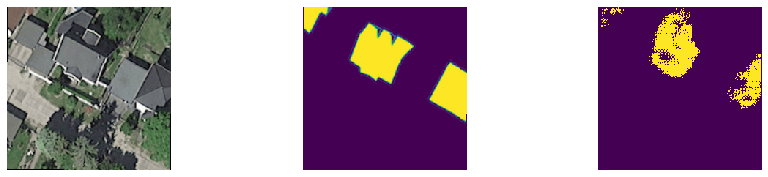

3/3 [==============================] - 3s 905ms/step - loss: 0.1635 - accuracy: 0.8860 - val_loss: 0.2104 - val_accuracy: 0.8555
Epoch 62/100
3/3 [==============================] - 2s 694ms/step - loss: 0.1491 - accuracy: 0.9127 - val_loss: 0.2111 - val_accuracy: 0.8552
Epoch 63/100
3/3 [==============================] - 2s 680ms/step - loss: 0.1428 - accuracy: 0.9083 - val_loss: 0.2115 - val_accuracy: 0.8540
Epoch 64/100
3/3 [==============================] - 2s 667ms/step - loss: 0.1448 - accuracy: 0.9124 - val_loss: 0.2110 - val_accuracy: 0.8532
Epoch 65/100
3/3 [==============================] - 2s 671ms/step - loss: 0.1571 - accuracy: 0.8910 - val_loss: 0.2121 - val_accuracy: 0.8509
Epoch 66/100
3/3 [==============================] - 2s 670ms/step - loss: 0.1526 - accuracy: 0.9004 - val_loss: 0.2166 - val_accuracy: 0.8466
Epoch 67/100
3/3 [==============================] - 2s 672ms/step - loss: 0.1318 - accuracy: 0.9195 - val_loss: 0.2192 - val_accuracy: 0.8449
Epoch 68/100
3/3 [=

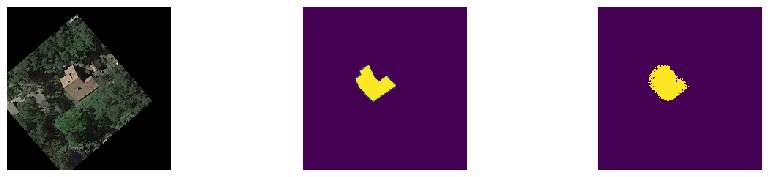

3/3 [==============================] - 3s 888ms/step - loss: 0.1369 - accuracy: 0.9034 - val_loss: 0.2051 - val_accuracy: 0.8559
Epoch 72/100
3/3 [==============================] - 2s 670ms/step - loss: 0.1393 - accuracy: 0.9115 - val_loss: 0.2029 - val_accuracy: 0.8579
Epoch 73/100
3/3 [==============================] - 2s 677ms/step - loss: 0.1635 - accuracy: 0.8658 - val_loss: 0.2062 - val_accuracy: 0.8545
Epoch 74/100
3/3 [==============================] - 2s 672ms/step - loss: 0.1249 - accuracy: 0.9225 - val_loss: 0.2074 - val_accuracy: 0.8533
Epoch 75/100
3/3 [==============================] - 2s 700ms/step - loss: 0.1330 - accuracy: 0.9169 - val_loss: 0.2057 - val_accuracy: 0.8558
Epoch 76/100
3/3 [==============================] - 2s 674ms/step - loss: 0.1381 - accuracy: 0.9019 - val_loss: 0.2028 - val_accuracy: 0.8584
Epoch 77/100
3/3 [==============================] - 2s 675ms/step - loss: 0.1112 - accuracy: 0.9338 - val_loss: 0.2013 - val_accuracy: 0.8569
Epoch 78/100
3/3 [=

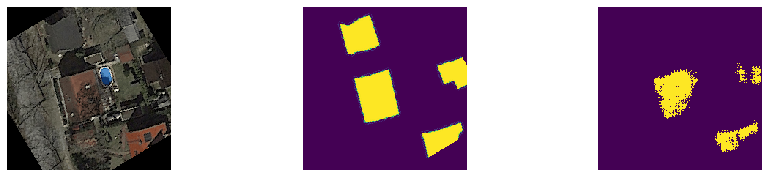

3/3 [==============================] - 3s 894ms/step - loss: 0.1305 - accuracy: 0.9196 - val_loss: 0.1938 - val_accuracy: 0.8587
Epoch 82/100
3/3 [==============================] - 2s 677ms/step - loss: 0.1334 - accuracy: 0.9104 - val_loss: 0.1915 - val_accuracy: 0.8618
Epoch 83/100
3/3 [==============================] - 2s 683ms/step - loss: 0.1224 - accuracy: 0.9108 - val_loss: 0.1917 - val_accuracy: 0.8629
Epoch 84/100
3/3 [==============================] - 2s 682ms/step - loss: 0.1294 - accuracy: 0.9066 - val_loss: 0.1914 - val_accuracy: 0.8640
Epoch 85/100
3/3 [==============================] - 2s 660ms/step - loss: 0.1239 - accuracy: 0.9158 - val_loss: 0.1916 - val_accuracy: 0.8654
Epoch 86/100
3/3 [==============================] - 2s 653ms/step - loss: 0.1067 - accuracy: 0.9265 - val_loss: 0.1923 - val_accuracy: 0.8660
Epoch 87/100
3/3 [==============================] - 2s 673ms/step - loss: 0.1324 - accuracy: 0.9099 - val_loss: 0.1907 - val_accuracy: 0.8661
Epoch 88/100
3/3 [=

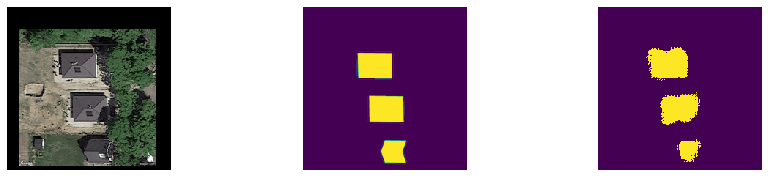

3/3 [==============================] - 3s 909ms/step - loss: 0.1183 - accuracy: 0.9212 - val_loss: 0.1817 - val_accuracy: 0.8708
Epoch 92/100
3/3 [==============================] - 2s 678ms/step - loss: 0.1165 - accuracy: 0.9207 - val_loss: 0.1818 - val_accuracy: 0.8677
Epoch 93/100
3/3 [==============================] - 2s 674ms/step - loss: 0.1223 - accuracy: 0.9171 - val_loss: 0.1852 - val_accuracy: 0.8640
Epoch 94/100
3/3 [==============================] - 2s 669ms/step - loss: 0.1226 - accuracy: 0.9027 - val_loss: 0.1877 - val_accuracy: 0.8621
Epoch 95/100
3/3 [==============================] - 2s 678ms/step - loss: 0.1250 - accuracy: 0.9066 - val_loss: 0.1895 - val_accuracy: 0.8613
Epoch 96/100
3/3 [==============================] - 2s 664ms/step - loss: 0.1128 - accuracy: 0.9217 - val_loss: 0.1885 - val_accuracy: 0.8628
Epoch 97/100
3/3 [==============================] - 2s 659ms/step - loss: 0.1043 - accuracy: 0.9413 - val_loss: 0.1848 - val_accuracy: 0.8658
Epoch 98/100
3/3 [=

In [4]:
epochs = 100
steps_per_epoch = nb_train // batch_size
val_steps = nb_val // batch_size

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

callbacks = [util.DisplayCallback(train, model, intv=10)]
history = model.fit(train,
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch,                              
                    validation_data=val,
                    validation_steps=val_steps,
                    callbacks=callbacks)

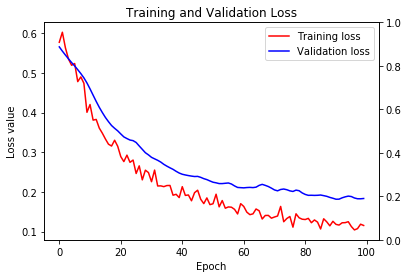

In [5]:
util.show_model_history(history, epochs)

## Evaluate predictions

We evaluate the learned model on test images for which we don't have labels

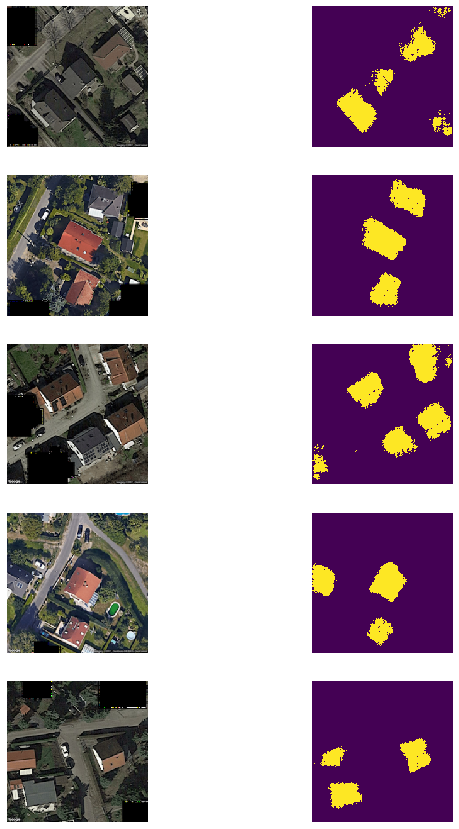

In [6]:
test, nb_test = data.get_test_dataset(data_dir)
util.show_predictions(test, model, num=nb_test)